### 17. Letter Combinations of a Phone Number

In [ ]:
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        phonedict = dict()
        phonedict[2], phonedict[3], phonedict[4], phonedict[5], phonedict[6] = 'abc', 'def', 'ghi', 'jkl', 'mno'
        phonedict[7], phonedict[8], phonedict[9] = 'pqrs', 'tuv', 'wxyz'

        res = []
        def rec(digits, word, c, i):
            if i > len(digits):
                return
            word += c
            if len(word) == len(digits):
                res.append(word)
                return
            for c in phonedict[int(digits[i])]:
                rec(digits, word, c, i+1)
            return
                
        rec(digits, '', '', 0)
        return [r for r in res if r != ""]

- First, I saved the strings corresponding to a digit on the phone in the dictionary `phonedict`.
- Then I used the recursive function `rec`, to accumulate every combination of letters for the given `digits`.  

### 22. Generate Parantheses

In [ ]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        res = []
        def bt(opened, closed, s) -> None:
            if closed > opened or opened > n or closed > n:
                return
            if closed == opened == n:
                res.append(s)
                return
            bt(opened+1, closed, s + '(')
            bt(opened, closed+1, s + ')')
            
        bt(0,0,'')
        return res

- The intended Solution was to use backtracking with a cutoff condition of `closed > opened`.
- I achieved this with the recursive function `bt`, which calls itself until it either reaches the cutoff condition or a valid string `s` has been found, which will be appended to `res`, the list holding all valid results.

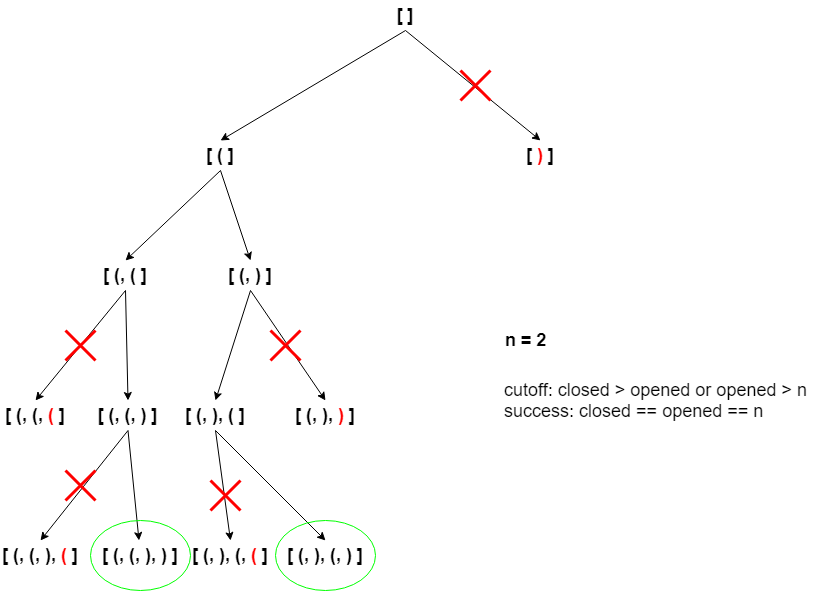

### 39. Combination Sum

In [ ]:
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:

        res = set()
        def bt(combination, sm, candidates, target):
            if sm > target:
                return
            elif sm == target:
                scm = sorted(combination)
                if not tuple(scm) in res:
                    res.add( tuple(scm) )

            for num in candidates:
                copy = combination.copy()
                copy.append(num)
                bt(copy, sm+num, candidates, target)
        
        for num in candidates:
            bt([num], num, candidates, target)

        return [list(r) for r in res]

- The way I solved this was by backtracking with the cutoff condition that the current sum, `sm`, is greater than the `target`.

### 40. Combination Sum II

In [ ]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        candidates.sort()
        
        res = []
        def bt(combination, pos, sm):
            if sm == 0:
                res.append(combination.copy())
            if sm <= 0:
                return
            
            prev = None
            for i in range(pos, len(candidates)):
                val = candidates[i]
                if val == prev:
                    continue
                combination.append(val)
                bt(combination, i+1, sm-val)
                combination.pop()
                prev = val
            return
                
        bt([], 0, target)
        return res

- How it works is that we first sort the list of `candidates`, and for every unique candidate, we recursively traverse over the remaining list to its right, which starts at `pos`.
- Whenever the sum of our current `combination`, `sm`, overshoots the `target`, we have reached a cutoff condition.

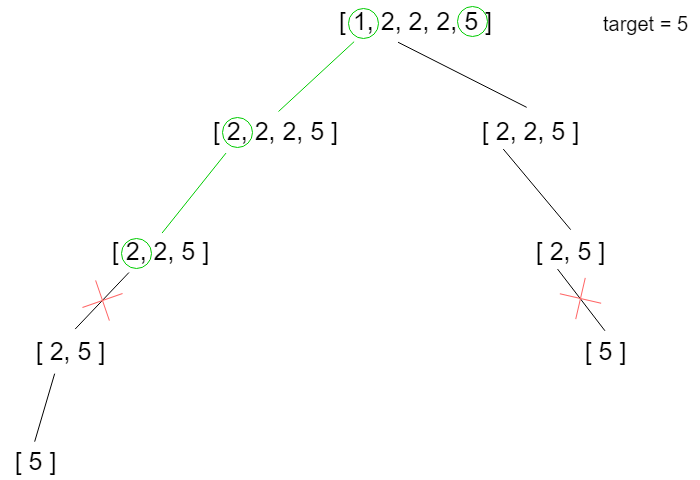

### 51. N-Queens

In [ ]:
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        board = [ ["."]*n for _ in range(n) ]
        columns, posDiag, negDiag = set(), set(), set()
        res = []

        def bt(row: int):
            if row == n:
                f_board = [ "".join(r) for r in board ]
                res.append(f_board)
                return

            for col in range(n):
                if not ( col in columns or (row + col) in posDiag or (row - col) in negDiag ):
                    columns.add(col)
                    posDiag.add(row + col)
                    negDiag.add(row - col)
                    board[row][col] = "Q"
                    
                    bt(row + 1)

                    columns.remove(col)
                    posDiag.remove(row + col)
                    negDiag.remove(row - col)
                    board[row][col] = "."
            return

        bt(0)
        return res

- The approach here is to go through the `board` `row` by `row`, trying out all possible positions for placing a queen for each `row`.
- For this, we utilize backtracking with the cutoff condition that a position's `column`, positive diagonal `posDiag`, or negative diagonal `negDiag` has already been visited previously along the path.

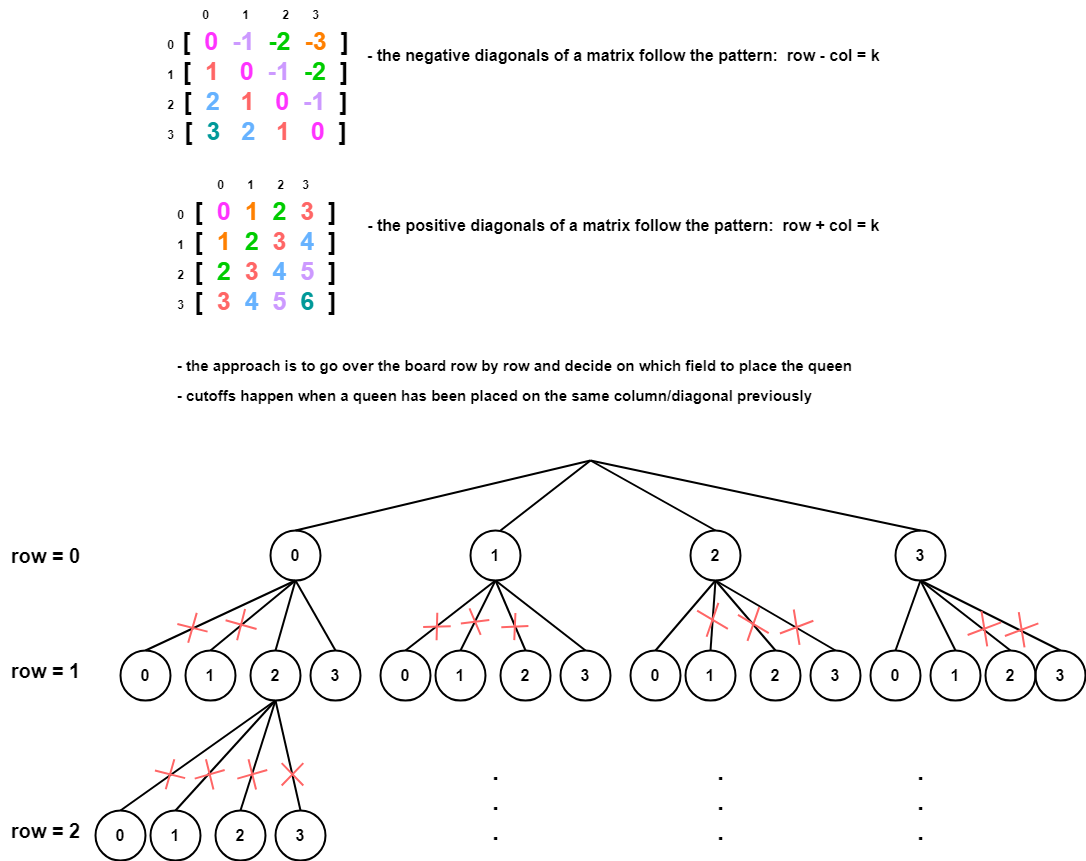

### 78. Subsets

In [ ]:
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:

        res = set()
        def bt(currentset, nums):
            if not currentset in res:
                res.add( currentset )
            else:
                return
            
            for num in nums:
                if not num in currentset:
                    l = list(currentset)
                    l.append(num)
                    bt(frozenset(l), nums)
        bt(frozenset([]), nums)

        return [ list(s) for s in res ]

- We use a backtracking approach to iterate over all combinations of sets with the given `nums`.
- The cutoff condition will be whenever we encounter a set that has already been encountered and added to our results, `res`.
- It is important to note that we had to use `frozenset` here because a set can only contain immutable sets.

### 79. Word Search

In [ ]:
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        # perform a dfs for every field
        # base cases: we are out of bounds, the current field is not equal to the current letter, the current field is in prev

        ROWS, COLS = len(board), len(board[0])
        prev = set()
        def dfs(row, col, word, i):
            if row < 0 or row >= ROWS or col < 0 or col >= COLS or board[row][col] != word[i] or (row,col) in prev:
                return False
            if i == len(word)-1:
                return True

            prev.add((row,col))
            res = any([ dfs(row-1, col, word, i+1), dfs(row, col+1, word, i+1), dfs(row+1, col, word, i+1), dfs(row, col-1, word, i+1) ])
            prev.remove((row,col))
            return res

        for row in range(ROWS):
            for col in range(COLS):
                if dfs(row, col, word, 0):
                    return True
        return False

- Luckily, I had already completed *212. Word Search II* earlier, which made this a lot easier.
- We have to perform a DFS with backtracking for every field on the `board`, with the base cases that the current `row` and `col` are out of bounds, or the letter on the current field is not equal to the current letter in the `word`, or we have already seen the current field.

### 90. Subsets II

In [ ]:
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:

        res = []
        def bt(currentset, remainder):
            s_set = sorted(currentset)
            if not s_set in res:
                res.append( s_set )
            else: 
                return
            if not remainder:
                return
            
            for num in remainder:
                c = currentset.copy()
                c.append(num)
                r = remainder.copy()
                r.remove(num)
                bt(c, r)
        bt([], nums)

        return res

- We are using a simple backtracking approach here, with the cutoff condition that a set has already been encountered.
- I was not quite sure how to make use of multisets, so I decided to go with sorted lists at the sacrifice of performance.

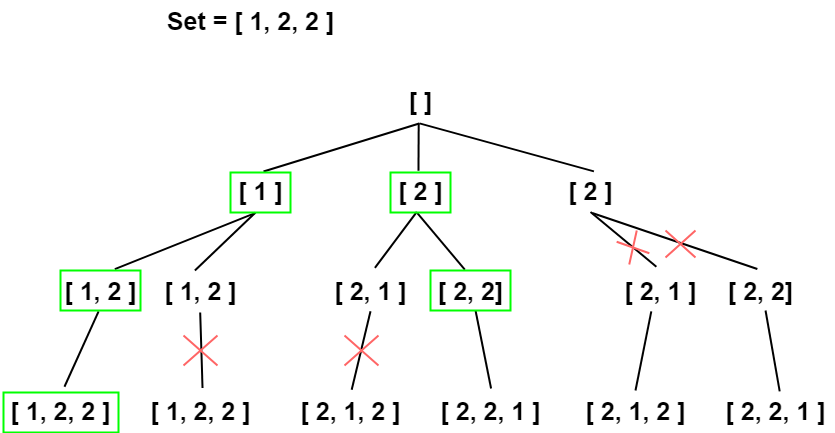

### 95. Unique Binary Search Trees II

In [ ]:
class Solution:
    def getTrees(self, start, end):
        if start > end:  # the current node does not have any subtrees
            return [None]
        
        # for every root node in the range of n, we calculate the node's left and right subtrees
        res = []
        for root in range(start, end+1):
            leftTrees = self.getTrees(start, root-1)  # i.e. for root: 3  leftTrees:  Trees(1,2) -> ...
            rightTrees = self.getTrees(root+1, end)   #                   rightTrees: Trees(4,3) -> [None]

            # actually build the trees and add them to res
            for l in leftTrees:
                for r in rightTrees:
                    res.append(TreeNode(root, l, r))

        return res

    def generateTrees(self, n: int) -> List[Optional[TreeNode]]:
        return self.getTrees(1, n)

- How it works is that we recursively calculate every possible left and right subtree for every `root` in the range `n`.
- The left subtrees, `leftTrees`, will be all possible trees in the range `1` to `root-1`, while the right subtrees, `rightTrees`, will be all possible trees in the range `root+1` to `n`.

### 97. Interleaving String

In [ ]:
class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        
        m = dict()
        found = False
        def bt(s1, s2, s3):
            nonlocal found
            if found: 
                return True
            if not s1 and not s2 and not s3: 
                found = True
                return True
            if (s1,s2) in m:
                return m[(s1,s2)]
            
            r1,r2 = False,False
            if s3 and s1 and s1[0] == s3[0]:
                r1 = bt(s1[1:], s2, s3[1:])
            if s3 and s2 and s2[0] == s3[0]:
                r2 = bt(s1, s2[1:], s3[1:])
                
            m[(s1,s2)] = r1 or r2
            return r1 or r2
        
        return bt(s1,s2,s3)

- I solved this problem with a **Backtracking** approach combined with **Memoization**.
- How it works is that we try all possible ways of constructing `s3` from `s1` and `s2` and cut off whenever we reach a state where the first letter of `s3` does not match either of the first letters of `s1` and `s2`.
- We save the results in a dictionary `m` such that we can avoid recalculating a result that we have already calculated.

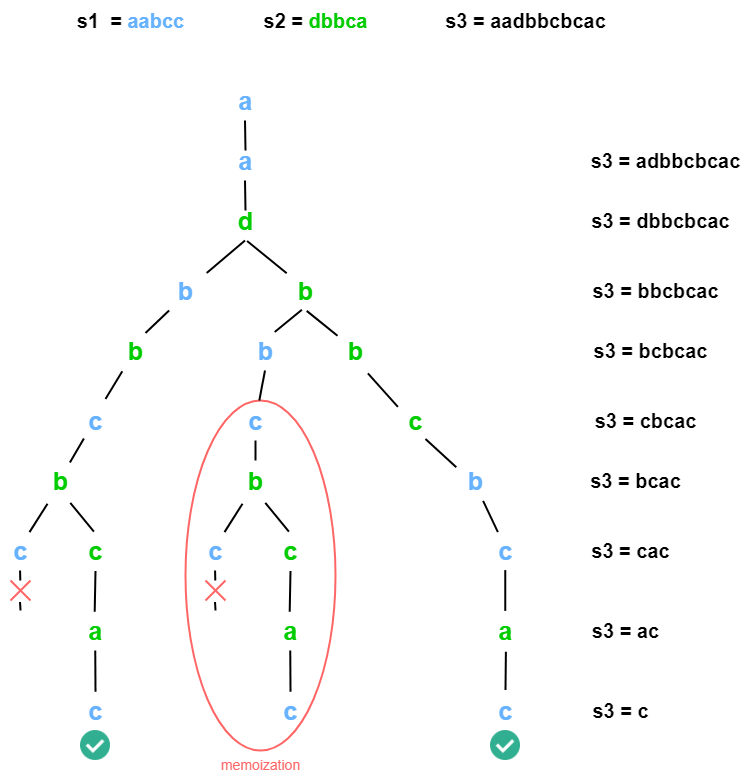

### 131. Palindrome Partitioning

In [ ]:
class Solution:
    def isPalindrome(self, s: str, left: int, right: int):
        while left < right:
            if s[left] != s[right]:
                return False
            left += 1
            right -= 1
        return True

    def partition(self, s: str) -> List[List[str]]:
        res, curr = [], []
        def dfs(pos: int):
            if pos > len(s)-1:
                res.append(curr.copy())
                return
            
            for i in range(pos, len(s)):
                if self.isPalindrome(s, pos, i):
                    curr.append(s[pos:i+1])
                    dfs(i+1)
                    curr.pop()
            return
            
        dfs(0)
        return res 

- The approach is to go through every substring of `s`, starting at `pos`, and recursively repeat this for the remainder of `s` when the current substring is a palindrome, which we verify with the helper function `isPalindrome()`.
- The cutoff condition here is that the current substring is not a palindrome.

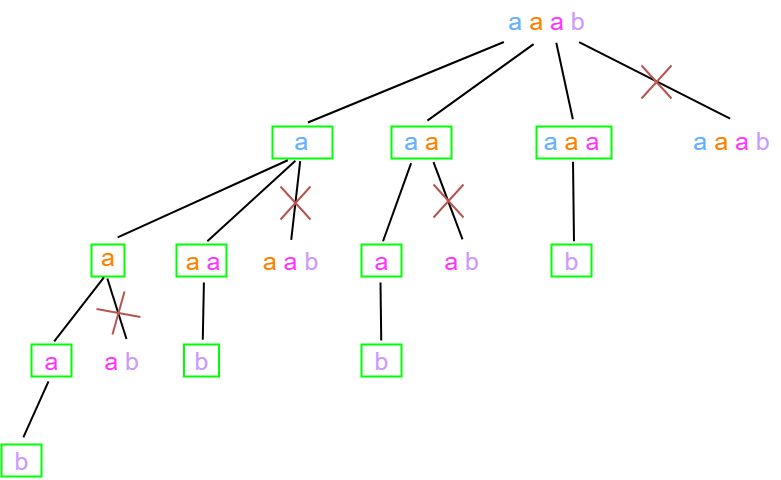

### 139. Word Break

In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        wordDict = set(wordDict)
        res, seen = False, set()

        def bt(constructed, remainder, wordDict):
            # memoization happens here. we keep track of the words we have already tried so we don't end up trying them again
            if constructed not in seen: seen.add(constructed)
            else: return
            
            # we have succesfully constructed the string from wordDict
            if not remainder:
                nonlocal res 
                res = True
                return

            for word in wordDict:
                if remainder.startswith(word):
                    bt(constructed + word, remainder[len(word):], wordDict)
            return

        bt("", s, wordDict)
        return res

- We perform a **Depth-first search** to construct `s` with the given `wordList`.
- On every recursive call, we iterate over `wordList`, and start another recursive call for every `word` that matches the beginning of the `remainder` of `s`.
- Eventually we will either have no `remainder`, which means that we have successfully constructed `s`, or we don't have any words left that match the beginning of the `remainder`, at which point we cut off.

### 403. Frog Jump

In [ ]:
class Solution:
    def canCross(self, stones: List[int]) -> bool:
        end_stone = stones[-1]
        stones = set(stones)
        
        # adding the cache wrapper to ensure previous calculations are memoized and we don't have to explicitly save them in a memoization dict
        @cache
        def dfs(stone, jump):
            if stone == end_stone: return True
            if not stone in stones: return False
            
            res = False
            for j in [ jump-1, jump, jump+1 ]:
                # if j is not greater zero we stay on the same stone infinitely
                if j > 0: res |= dfs(stone+j, j)
            return res
            
        return dfs(0,0)

- I solved this problem using **Depth-first search** with **Memoization**.
- How it works is that we start on the first `stone`, and recursively try to reach the last stone, `end_stone`, by calling our `dfs` with the current `jump` in the allowed range (between plus and minus one) and adding the `jump` on top of the current `stone`.